# Stats about https://ctftime.org

In [1]:
import datetime
datetime.datetime.now()

datetime.datetime(2022, 8, 14, 20, 57, 0, 905799)

## Top rated CTFs

In [2]:
!pip install lxml


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install html5lib


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [4]:
import pandas as pd

In [5]:
import requests

In [6]:
ff_header = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:99.0) Gecko/20100101 Firefox/99.0'}

In [7]:
r = requests.get(
    'https://ctftime.org/ctfs',
    headers=ff_header)

In [8]:
import bs4

In [9]:
tree = bs4.BeautifulSoup(markup=r.text)

In [10]:
tiles = tree.find_all('li', attrs={'class': "span4 ctf-tile"})

In [11]:
tile = tiles[0]

In [12]:
tile.find('p').text

'\nOfficial URL\nTotal events: 18\nAvg weight: 39.79'

In [13]:
data = []
for tile in tiles:
    title = tile.find('a').text

    *_, events, avg_weight = tile.find('p').text.strip().splitlines()
    # print(title, avg_weight, events)

    data.append((title, float(avg_weight.split(':')[-1]), int(events.split(':')[-1])))

In [14]:
df = pd.DataFrame(data=data,
                 columns=['name', 'avg_weight', 'events'])
df.head()

,name,avg_weight,events
0,SECCON CTF,39.79,18
1,UCSB iCTF,46.30,16
2,Insomni'hack,38.02,16
3,0CTF,72.79,15
4,Trend Micro CTF - Raimund Genes Cup,22.42,14


In [15]:
df.sort_values('avg_weight').tail(30)

,name,avg_weight,events
64,SECUINSIDE CTF Quals,47.35,5
35,CTFZone,47.67,8
73,EKOPARTY CTF,47.88,5
100,N1CTF,47.91,4
31,bi0sCTF,48.23,8
39,ångstromCTF,50.71,7
19,ASIS CTF Quals,51.13,10
122,RuCTF Quals,53.33,3
162,saarCTF,53.54,3
12,Dragon CTF,55.20,12


In [16]:
df[df['events']>=12]

,name,avg_weight,events
0,SECCON CTF,39.79,18
1,UCSB iCTF,46.30,16
2,Insomni'hack,38.02,16
3,0CTF,72.79,15
4,Trend Micro CTF - Raimund Genes Cup,22.42,14
5,RuCTF Finals,31.43,13
6,DEF CON CTF Qualifier,80.58,12
7,DEF CON CTF,82.60,12
8,RuCTF,74.06,12
9,PlaidCTF,89.17,12


array([[<AxesSubplot:title={'center':'avg_weight'}>,
        <AxesSubplot:title={'center':'events'}>]], dtype=object)

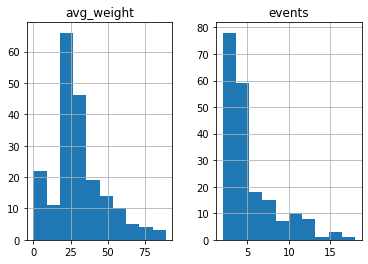

In [17]:
df.hist()

In [18]:
df.describe()

,avg_weight,events
count,200.000000,200.000000
mean,29.714200,5.200000
std,17.786529,3.147943
min,0.000000,2.000000
25%,20.680000,3.000000
50%,27.050000,4.000000
75%,36.725000,6.000000
max,89.170000,18.000000


## PYMI team

CTF write-up https://github.com/pymivn/ctf

https://ctftime.org/team/175619

In [19]:
rt = requests.get('https://ctftime.org/team/175619', 
                 headers=ff_header)
rt

<Response [200]>

In [20]:
dft = pd.read_html(rt.text)[0]
dft.head()

,Place,Place.1,Event,CTF points,Rating points
0,NaN,108,SHELLCTF 2022,2930.0,11.916
1,NaN,228,corCTF 2022,332.0,1.064
2,NaN,95,UIUCTF 2022,517.0,2.199
3,NaN,72,Lexington Informatics Tournament CTF 2022,2673.0,7.320
4,NaN,90,BDSec CTF 2022,1365.0,5.112


In [21]:
top10 = dft.drop(columns=['Place']).sort_values('Rating points', ascending=False)[:10]

In [22]:
top10

,Place.1,Event,CTF points,Rating points
15,140,ångstromCTF 2022,1510.0,18.171
12,33,Cyber Apocalypse CTF 2022: Intergalactic Chase,12200.0,16.155
0,108,SHELLCTF 2022,2930.0,11.916
28,41,DefCamp CTF 21-22 Online,1208.0,11.179
14,29,San Diego CTF 2022,3640.0,10.036
16,45,NahamCon CTF 2022,8314.0,8.572
3,72,Lexington Informatics Tournament CTF 2022,2673.0,7.320
5,72,ImaginaryCTF 2022,2700.0,6.285
23,59,1337UP LIVE CTF,2815.0,6.136
17,75,b01lers CTF,654.0,5.761


In [23]:
top10['Rating points'].sum()

101.53099999999998